In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Define our imshow function 
def imshow(title = "Image", image = None, size = 5):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

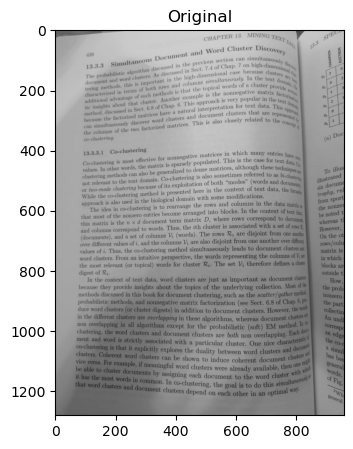

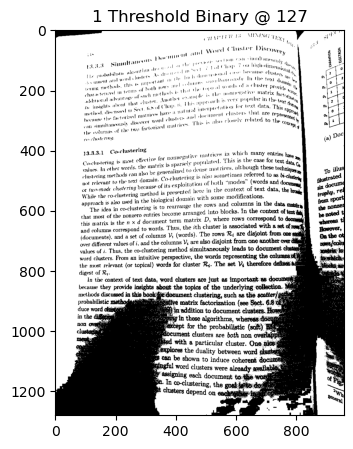

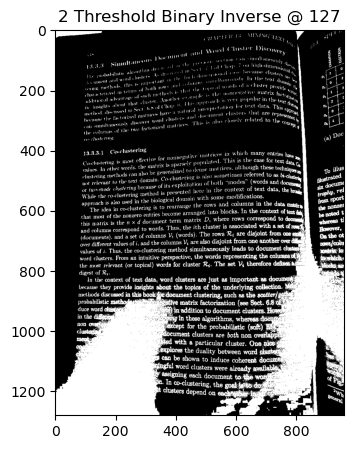

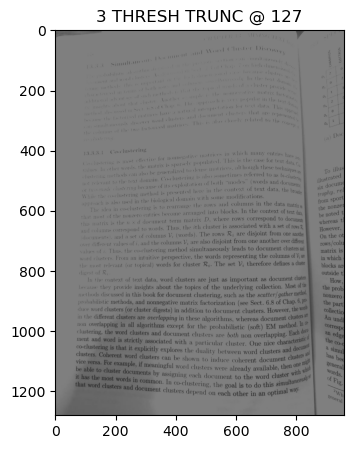

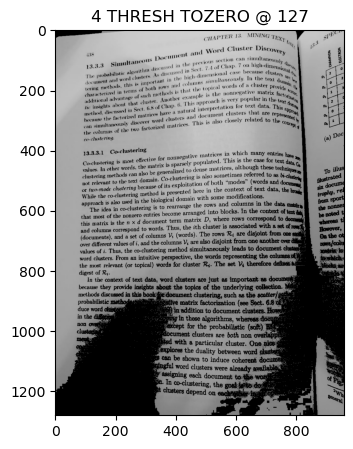

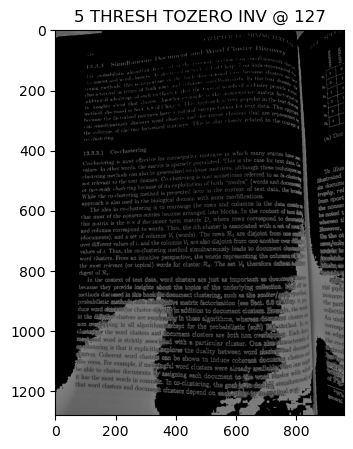

In [5]:
# Load our image as greyscale 
image = cv2.imread('scan.jpeg',0)
imshow("Original", image)

# Values below 127 goes to 0 or black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
imshow('1 Threshold Binary @ 127', thresh1)

# Values below 127 go to 255 and values above 127 go to 0 (reverse of above)
ret,thresh2 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)
imshow('2 Threshold Binary Inverse @ 127', thresh2)

# Values above 127 are truncated (held) at 127 (the 255 argument is unused)
ret,thresh3 = cv2.threshold(image, 127, 255, cv2.THRESH_TRUNC)
imshow('3 THRESH TRUNC @ 127', thresh3)

# Values below 127 go to 0, above 127 are unchanged  
ret,thresh4 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO)
imshow('4 THRESH TOZERO @ 127', thresh4)

# Reverse of the above, below 127 is unchanged, above 127 goes to 0
ret,thresh5 = cv2.threshold(image, 127, 255, cv2.THRESH_TOZERO_INV)
imshow('5 THRESH TOZERO INV @ 127', thresh5)

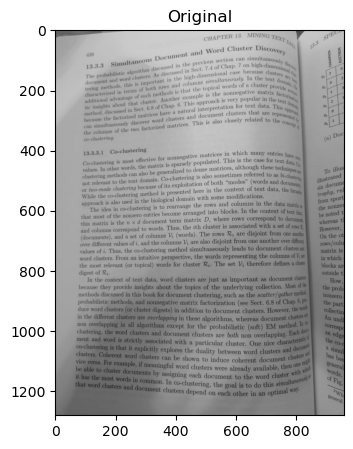

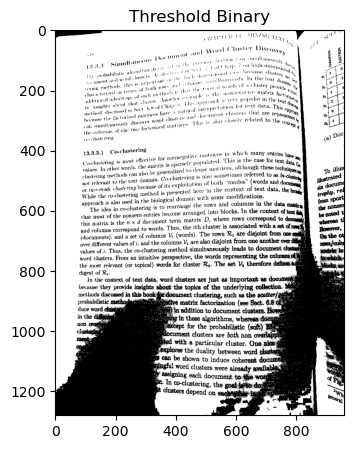

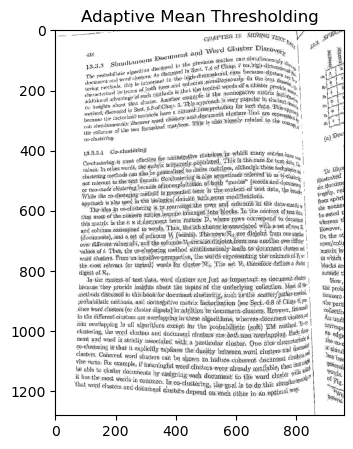

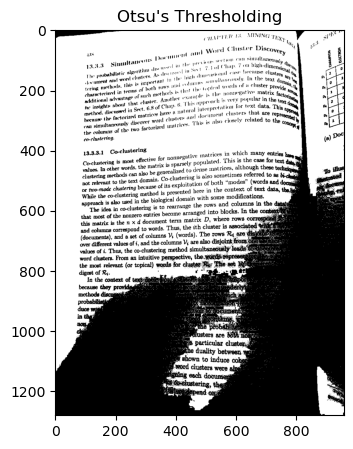

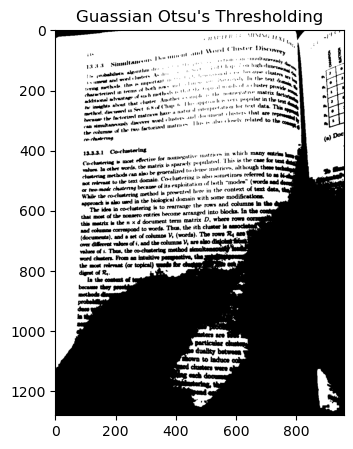

In [8]:
image = cv2.imread('scan.jpeg',0)
imshow("Original", image)

# Values below 127 goes to 0 (black, everything above goes to 255 (white)
ret,thresh1 = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
imshow('Threshold Binary', thresh1)

# It's good practice to blur images as it removes noise
#image = cv2.GaussianBlur(image, (3, 3), 0)

# Using adaptiveThreshold
thresh = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5) 
imshow("Adaptive Mean Thresholding", thresh) 

_, th2 = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("Otsu's Thresholding", th2) 

# Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(image, (5,5), 0)
_, th3 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("Guassian Otsu's Thresholding", th3) 

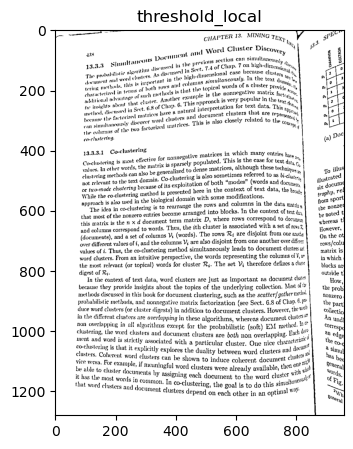

In [9]:
from skimage.filters import threshold_local

image = cv2.imread('scan.jpeg')

# We get the Value component from the HSV color space 
# then we apply adaptive thresholdingto 
V = cv2.split(cv2.cvtColor(image, cv2.COLOR_BGR2HSV))[2]
T = threshold_local(V, 25, offset=15, method="gaussian")

# parameters for threshold_local
# - image: The input image on which the local thresholding will be applied.
# - block_size: The size of the local neighborhood (block) used for computing the threshold value. It specifies the width and height of the square block. For example, block_size=25 means a square block of size 25x25 will be used.
# - offset: A constant value subtracted from the computed threshold value. It allows you to adjust the threshold value. Positive values make the threshold more strict, while negative values make it more lenient.
# - method: The method used for computing the threshold value within the local neighborhood. The available methods are:
#   - "mean": Computes the mean value of the local neighborhood as the threshold.
#   - "median": Computes the median value of the local neighborhood as the threshold.
#   - "gaussian": Computes the weighted sum of the local neighborhood using a Gaussian window as the weights. This method gives more weight to the central pixels.

# Apply the threshold operation 
thresh = (V > T).astype("uint8") * 255
imshow("threshold_local", thresh)

### **Why Bluring is Important before Thresholding?** 

Blurring an image before thresholding is often important because it helps to reduce noise and smooth out irregularities in the image. This can lead to better and more accurate thresholding results.

Here are a few reasons why blurring is commonly performed before thresholding:

1. Noise Reduction: Images captured from various sources, such as cameras or scanners, can contain noise or unwanted variations in pixel values. Blurring the image using techniques like Gaussian blur helps to reduce noise and create a smoother image, which can improve the accuracy of thresholding.

2. Smoothing Edges: Blurring can help to smooth out sharp edges and fine details in an image. This can be beneficial when applying thresholding, as it reduces the likelihood of thresholding being influenced by small, high-frequency variations in pixel values.

3. Enhancing Object Boundaries: Blurring can help to enhance the boundaries of objects in an image. By smoothing the transitions between different regions, blurring can make it easier to distinguish objects from the background, leading to more accurate thresholding results.

4. Improving Thresholding Performance: Thresholding algorithms often assume that the image has a certain level of smoothness or continuity. By blurring the image, we can align it more closely with these assumptions, which can improve the performance and reliability of thresholding techniques.

However, it's important to note that blurring is not always necessary or beneficial in every situation. The decision to blur an image before thresholding depends on the specific characteristics of the image and the desired outcome. It's always a good idea to experiment with different preprocessing techniques, including blurring, to find the best approach for a particular image processing task.